## Importing Libraries

In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#To display inline output
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/apple-twitter.csv', encoding='latin-1')

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


## Removing unnecessary fields

In [4]:
#dropping NaN and "dont care" response to setup a binary analysis.
df = df[df['sentiment']!='not_relevant']
df = df.reset_index()

#dropping the extra columns
df = df.drop(['index', '_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'date','id','query', 'sentiment_gold'], axis =1)


In [5]:
df.head()

,sentiment,sentiment:confidence,text
0,3,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,1.0000,My cat only chews @apple cords. Such an #Apple...
3,3,0.5848,I agree with @jimcramer that the #IndividualIn...
4,3,0.6474,Nobody expects the Spanish Inquisition #AAPL


## Encoding the values to 0's and 1's

In [6]:
def encoder(x):
    #A simple class encoder to get to 1s and 0s for each of the sentiment
    if x == '5':
        return 1
    else:
        return 0

#Apply encoder to sentiment column
df['sentiment'] = df['sentiment'].apply(encoder)

df.head(10)

,sentiment,sentiment:confidence,text
0,0,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,0,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,0,1.0000,My cat only chews @apple cords. Such an #Apple...
3,0,0.5848,I agree with @jimcramer that the #IndividualIn...
4,0,0.6474,Nobody expects the Spanish Inquisition #AAPL
5,0,0.5975,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,1,0.8468,Top 3 all @Apple #tablets. Damn right! http://...
7,1,0.6736,CNBCTV: #Apple's margins better than expected?...
8,0,0.7997,Apple Inc. Flash Crash: What You Need to Know ...
9,0,0.6360,#AAPL:This Presentation Shows What Makes The W...


Sentiment count

0    3381
1     423
Name: sentiment, dtype: int64


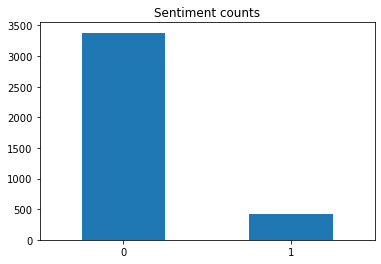

In [7]:
print('Sentiment count\n')
print(df.sentiment.value_counts())
df.sentiment.value_counts().plot.bar(rot=0)
plt.title('Sentiment counts')
plt.show()

## Data Visualisation

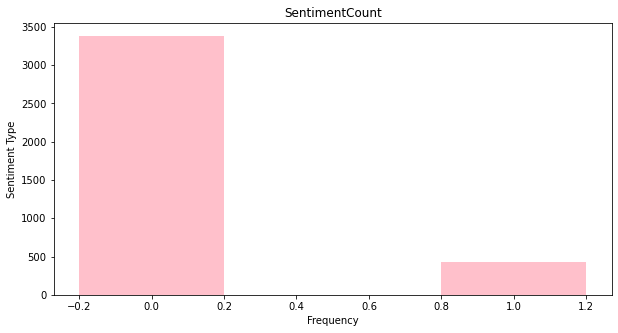

In [8]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar([0,1],[3381, 423], color ='pink',
        width = 0.4)
 
plt.xlabel("Frequency")
plt.ylabel("Sentiment Type")
plt.title("SentimentCount")
plt.show()

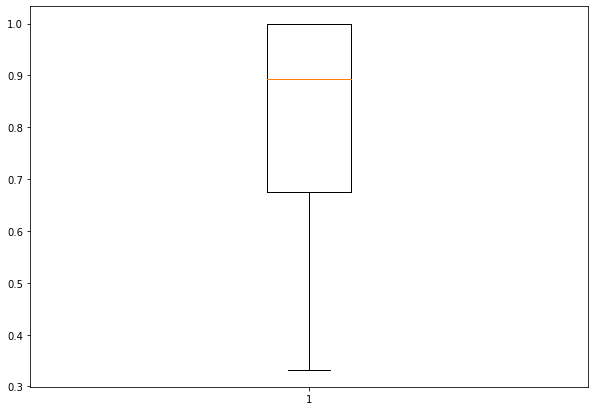

In [9]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['sentiment:confidence'])

# show plot
plt.show()

## Preprocessing of data

#### Clean data
Remove symbols: http://, #, @ which don't make any sense about the meaning of the tweet. 
Make all characters to lowercase

In [10]:
from sklearn.model_selection import train_test_split

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "") #remove website urls 
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "") #removes @user handles
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ") #removes punctuation marks
    df[text_field] = df[text_field].str.replace(r"@", "at") #?
    df[text_field] = df[text_field].str.lower() #convert all text letters to lowercase
    #remove short words having length < 3
    df[text_field] = df[text_field].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    return df

df = standardize_text(df, 'text')
df.to_csv('data/clean_apple.csv') #store clean dataset in clean_apple.csv
df.head()

,sentiment,sentiment:confidence,text
0,0,0.6264,aapl best steve jobs emails ever
1,0,0.8129,aapl stock mini flash crash today aapl aapl
2,0,1.0000,only chews cords such applesnob
3,0,0.5848,agree with that individualinvestor should trad...
4,0,0.6474,nobody expects spanish inquisition aapl


### Tokenization
 Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [11]:
from nltk.tokenize import RegexpTokenizer

#NLTK tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['text'].apply(tokenizer.tokenize)

df.head()

,sentiment,sentiment:confidence,text,tokens
0,0,0.6264,aapl best steve jobs emails ever,"[aapl, best, steve, jobs, emails, ever]"
1,0,0.8129,aapl stock mini flash crash today aapl aapl,"[aapl, stock, mini, flash, crash, today, aapl,..."
2,0,1.0000,only chews cords such applesnob,"[only, chews, cords, such, applesnob]"
3,0,0.5848,agree with that individualinvestor should trad...,"[agree, with, that, individualinvestor, should..."
4,0,0.6474,nobody expects spanish inquisition aapl,"[nobody, expects, spanish, inquisition, aapl]"


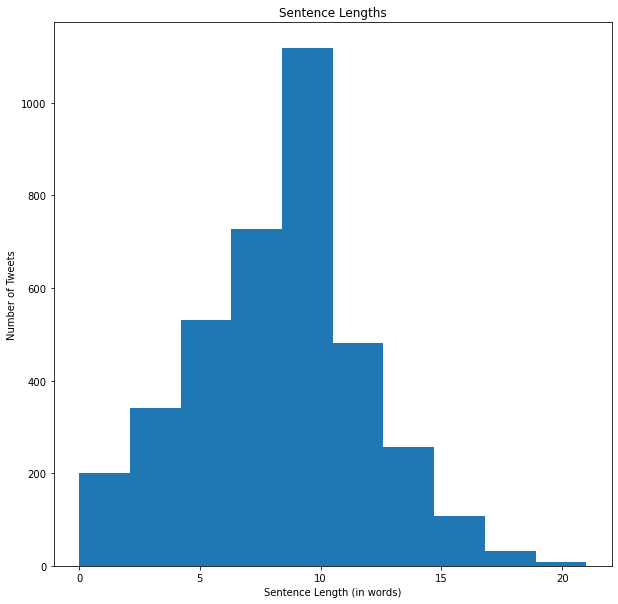

In [12]:
sentence_lengths = [len(tokens) for tokens in df['tokens']]
vocab = sorted(list(set([word for tokens in df['tokens'] for word in tokens])))

plt.figure(figsize = (10,10))
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('Sentence Lengths')
plt.hist(sentence_lengths)
plt.show()


In [13]:
print('Words in vocab: ', len(vocab))

Words in vocab:  5177


## Stemming

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
#df['tokens']
tokenized_tweet = df['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
df['tokens']= tokenized_tweet
df.head()

,sentiment,sentiment:confidence,text,tokens
0,0,0.6264,aapl best steve jobs emails ever,"[aapl, best, steve, job, email, ever]"
1,0,0.8129,aapl stock mini flash crash today aapl aapl,"[aapl, stock, mini, flash, crash, today, aapl,..."
2,0,1.0000,only chews cords such applesnob,"[onli, chew, cord, such, applesnob]"
3,0,0.5848,agree with that individualinvestor should trad...,"[agre, with, that, individualinvestor, should,..."
4,0,0.6474,nobody expects spanish inquisition aapl,"[nobodi, expect, spanish, inquisit, aapl]"


## Stopwords

In [15]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Bag of words

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df[['text', 'sentiment:confidence']]
y = df['sentiment']

#splitting data for cross validation of model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)

#Keeping the assignment confidence for later
X_train_conf, X_test_conf = X_train['sentiment:confidence'], X_test['sentiment:confidence']
X_train, X_test = X_train['text'], X_test['text']

print(X_train[:5])

0                     aapl best steve jobs emails ever
1          aapl stock mini flash crash today aapl aapl
2                      only chews cords such applesnob
3    agree with that individualinvestor should trad...
4              nobody expects spanish inquisition aapl
Name: text, dtype: object


In [17]:
#vectorization with TFIDF and scikit learn
vect = TfidfVectorizer()
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)


#sparse matrix rows << columns
X_train_tfidf[0]

<1x4610 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

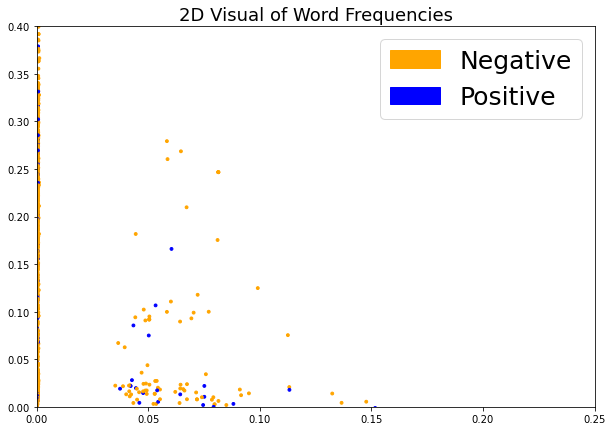

In [18]:
## 2D Visual of Word Frequencies

from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_lsa(text, labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(text)
    lsa_scores = lsa.transform(text)
    color_dict = {label:idx for idx, label in enumerate(set(labels))}
    color_column = [color_dict[label] for label in labels]
    colors = ['orange', 'blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, c = labels, cmap = matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color='orange', label='Negative')
        green_patch = mpatches.Patch(color='blue', label='Positive')
        plt.legend(handles=[red_patch, green_patch], prop={'size': 25})

fig = plt.figure(figsize =(10,7))
plot_lsa(X_train_tfidf, y_train)
plt.xlim(0,0.25)
plt.ylim(0,0.4)
plt.title("2D Visual of Word Frequencies", size = 18)
plt.show()

## Model Implementations

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

logr = LogisticRegressionCV()
logr_train = logr.fit(X_train_tfidf, y_train)
y_pred_logr = logr_train.predict(X_test_tfidf)

In [20]:
# Testing Logistic Regression Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred_logr))
print('\nLogistic Classification Report: \n' , classification_report(y_test,  y_pred_logr))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_logr)
print(cm)

Logistic Regression Accuracy:  0.885676741130092

Logistic Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       671
           1       0.58      0.12      0.20        90

    accuracy                           0.89       761
   macro avg       0.74      0.56      0.57       761
weighted avg       0.86      0.89      0.85       761

Confusion Matrix: 
[[663   8]
 [ 79  11]]


In [21]:
# Finding False positives and False negatives

# False negatives
def find_fn(ypred, ytrue):
    y_fn  = X_test[(ypred==0)&(ypred!=ytrue)]
    return y_fn
fn = find_fn(y_pred_logr, y_test)
print('Number of False Negatives: ', fn.shape, '\n')
print('Example of false negative: ')
print(fn[:1].values, '\n')

# False positives
def find_fp(ypred, ytrue):
    y_fp  = X_test[(ypred==1)&(ypred!=ytrue)]
    return y_fp
fp = find_fp(y_pred_logr, y_test)
print('Number of False Positives: ', fp.shape, '\n')
print('Example of false positive: ')
print(fp[:1].values, '\n')

Number of False Negatives:  (79,) 

Example of false negative: 
['yeah thing inspired apple course apple here from 2002 tvad'] 

Number of False Positives:  (8,) 

Example of false positive: 
['apple aapl plans launch iphone6mini version 2015 2014'] 



## Random Forest

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

x=df['text']
y=df['sentiment']
#transform given text into a vector based on the frequency
transformer=CountVectorizer(analyzer='word').fit(x) 
x = transformer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

rf = RandomForestClassifier()
rf_train = rf.fit(x_train, y_train)
predict_rf=rf_train.predict(x_test)

In [23]:
#Testing Random Forest Model
print('Random Forest Accuracy: ', accuracy_score(y_test, predict_rf))
print('\n')
print(classification_report(y_test, predict_rf))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predict_rf))

Random Forest Accuracy:  0.8909329829172142


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       675
           1       0.54      0.24      0.34        86

    accuracy                           0.89       761
   macro avg       0.72      0.61      0.64       761
weighted avg       0.87      0.89      0.87       761

Confusion Matrix: 
[[657  18]
 [ 65  21]]


## Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

x=df['text']
y=df['sentiment']
#transform given text into a vector based on the frequency
transformer=CountVectorizer(analyzer='word').fit(x) 
x = transformer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

nb = MultinomialNB()
nb_train = nb.fit(x_train, y_train)
predict_nb=nb_train.predict(x_test)

In [25]:
#Testing Multinomial Naive Bayes Model
print('Multinomial Naive Bayes Accuracy: ', accuracy_score(y_test, predict_nb))
print('\n')
print(classification_report(y_test, predict_nb))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predict_nb))

Multinomial Naive Bayes Accuracy:  0.8423127463863338


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       675
           1       0.32      0.36      0.34        86

    accuracy                           0.84       761
   macro avg       0.62      0.63      0.63       761
weighted avg       0.85      0.84      0.85       761

Confusion Matrix: 
[[610  65]
 [ 55  31]]


## XGBoost Algorithm

In [26]:
# !pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_1.5.1/xgboost-1.5.2%2Ba09446d12b49b15b00dad944aa886091a6a76ec6-py3-none-win_amd64.whl

In [27]:
import xgboost as xgb
from sklearn import metrics
x=df['text']
y=df['sentiment']
transformer=CountVectorizer(analyzer='word').fit(x) 
x = transformer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)
xgb_model = xgb.XGBClassifier() # 91 % accuracy
xgb_train = xgb_model.fit(x_train, y_train)
predict_xgb=xgb_train.predict(x_test)

[14:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
#Testing XGBoost Model
print('XG Boost Accuracy: ', accuracy_score(y_test, predict_xgb))
print('\n')
print(classification_report(y_test, predict_xgb))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predict_xgb))

XG Boost Accuracy:  0.9014454664914586


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       675
           1       0.72      0.21      0.32        86

    accuracy                           0.90       761
   macro avg       0.81      0.60      0.64       761
weighted avg       0.89      0.90      0.88       761

Confusion Matrix: 
[[668   7]
 [ 68  18]]


## Model Evaluation

In [29]:
## Word Importance
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(vect, logr, 10)
print("Important Features for Sentiment Analysis: ")
print(importance)

Important Features for Sentiment Analysis: 
{0: {'tops': [(5.531896459221499, 'great'), (5.693909422404176, 'everyday'), (5.791032226817691, 'nice'), (5.941587454640283, 'innovative'), (6.273247450311822, 'cool'), (6.533335924764371, 'thanks'), (6.650681731090229, 'good'), (7.124354673277775, 'amazing'), (8.577309670892634, 'awesome'), (9.766665493381316, 'love')], 'bottom': [(-2.920137987168893, 'what'), (-3.08587198612182, 'tmobile'), (-3.153663089473728, 'apple'), (-3.1747431277772282, 'needs'), (-3.329955385555903, 'blog'), (-3.5656496295128117, 'doesn'), (-3.5703398953474834, 'into'), (-3.696878936737429, 'charger'), (-4.06769296709492, 'shit'), (-4.631832114801115, 'fuck')]}}


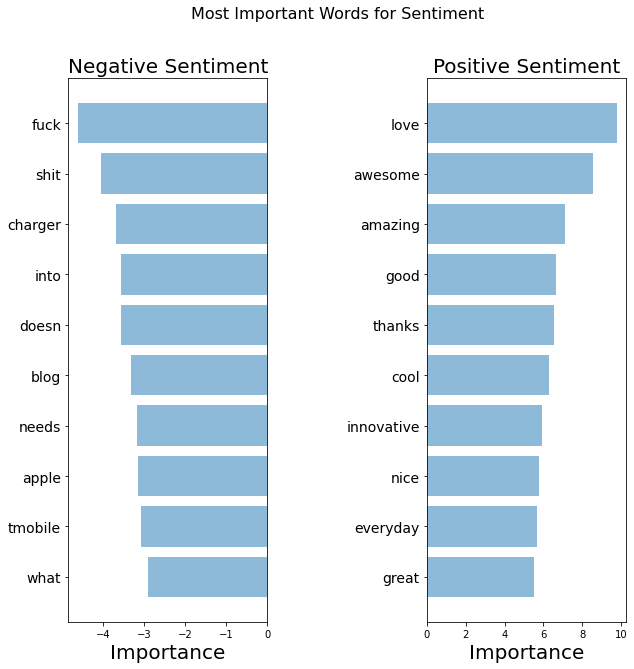

In [30]:
## Important Words
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative Sentiment', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive Sentiment', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most Important Words for Sentiment")